# Description

Gender : Male / Female

Height : Number (cm)

Weight : Number (Kg)

Index :

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
df1 = pd.get_dummies(df['Gender'])

In [7]:
df1.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [8]:
df = pd.concat([df1,df],axis=1)

In [9]:
df.head()

,Female,Male,Gender,Height,Weight,Index
0,0,1,Male,174,96,4
1,0,1,Male,189,87,2
2,1,0,Female,185,110,4
3,1,0,Female,195,104,3
4,0,1,Male,149,61,3


In [10]:
df.drop('Gender',axis=1,inplace=True)

In [11]:
df.head()

,Female,Male,Height,Weight,Index
0,0,1,174,96,4
1,0,1,189,87,2
2,1,0,185,110,4
3,1,0,195,104,3
4,0,1,149,61,3


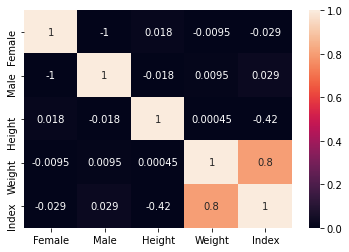

In [12]:
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1)

In [13]:
df.drop(['Female','Male'],axis=1,inplace=True)

In [14]:
df.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [15]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
ss.fit(df.drop('Index',axis=1))
scaled_array = ss.transform(df.drop('Index',axis=1))

In [16]:
X = pd.DataFrame(scaled_array,columns=['Height','Weight'])

In [17]:
y = df['Index']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [22]:
accuracy

0.8133333333333334

In [23]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()